In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import scipy.stats

In [2]:
df = pd.read_csv("deliverytime.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
df_org = df.copy()

In [4]:
label_encoder = LabelEncoder()
integer_values = label_encoder.fit_transform(df["Delivery_person_ID"])
df.insert(0, 'Person_ID', integer_values)
df = df.drop(['Delivery_person_ID', "ID"], axis=1)
df = df.sort_values('Person_ID')
delivery_id= df.groupby('Person_ID').cumcount() + 1
df.insert(1, 'delivery_id', delivery_id)

In [5]:
df.head(30)

,Person_ID,delivery_id,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
13244,0,1,39,4.4,27.163303,78.057044,27.203303,78.097044,Snack,scooter,31
7750,0,2,21,4.7,27.163303,78.057044,27.273303,78.167044,Drinks,motorcycle,22
18240,0,3,38,5.0,27.163303,78.057044,27.173303,78.067044,Meal,motorcycle,23
35450,0,4,34,4.6,27.163303,78.057044,27.203303,78.097044,Buffet,electric_scooter,18
29279,0,5,36,4.9,27.163303,78.057044,27.203303,78.097044,Meal,motorcycle,25
20236,0,6,34,4.9,27.163303,78.057044,27.273303,78.167044,Drinks,scooter,31
24595,0,7,20,4.8,27.163303,78.057044,27.233303,78.127044,Meal,motorcycle,23
12437,0,8,34,4.5,27.163303,78.057044,27.173303,78.067044,Meal,motorcycle,23
15371,0,9,25,5.0,27.163303,78.057044,27.173303,78.067044,Meal,scooter,19
38976,0,10,25,4.8,27.163303,78.057044,27.203303,78.097044,Buffet,motorcycle,28


In [6]:
means = df.groupby('Person_ID')['Time_taken(min)'].mean().reset_index()
sorted_means = means.sort_values(by='Time_taken(min)').reset_index(drop=True)
sorted_means['sort_id'] = sorted_means.index

In [7]:
sorted_means

,Person_ID,Time_taken(min),sort_id
0,860,19.444444,0
1,479,19.600000,1
2,468,19.750000,2
3,845,19.818182,3
4,723,20.000000,4
...,...,...,...
1315,506,32.400000,1315
1316,759,32.857143,1316
1317,48,33.666667,1317
1318,895,33.833333,1318


In [8]:
sorted_means = sorted_means.rename(columns={'Time_taken(min)': 'avg_time_person'})
times=df[["Person_ID", "Time_taken(min)"]]
times = pd.merge(times, sorted_means, on='Person_ID', how='left')

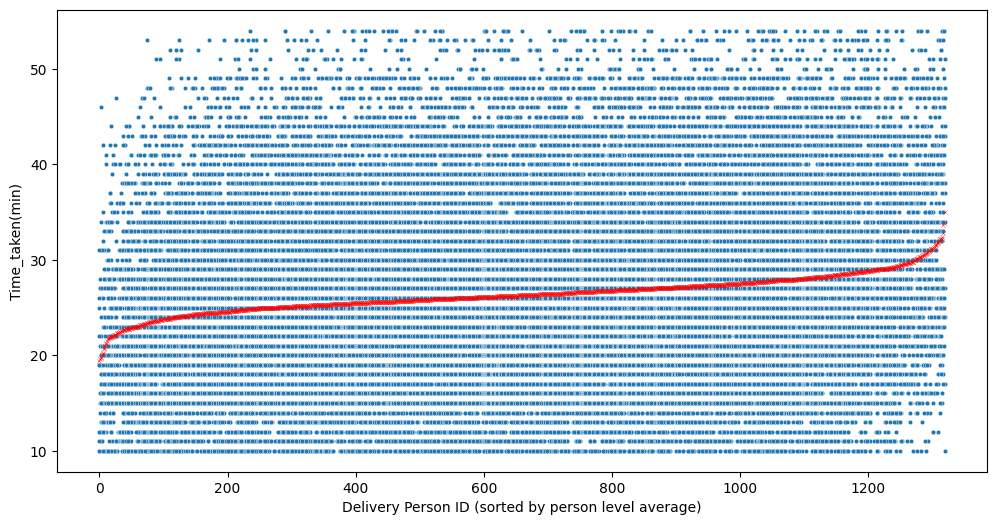

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sort_id', y='Time_taken(min)', data=times,  s=10)
sns.scatterplot(x='sort_id', y='avg_time_person', data=sorted_means, color='red', marker='x', s=10)
plt.xlabel("Delivery Person ID (sorted by person level average)")
plt.show()

In [10]:
time_within=df.groupby('Person_ID')["Time_taken(min)"].transform(lambda x: x - np.mean(x))

time_between = df.groupby('Person_ID')['Time_taken(min)'].mean().reset_index()

print("global mean/std\n", df["Time_taken(min)"].describe().apply("{0:.2f}".format), "between std\n",time_between["Time_taken(min)"].describe().apply("{0:.2f}".format),"\nWithin std\n", time_within.describe().apply("{0:.2f}".format) )

global mean/std
 count    45593.00
mean        26.29
std          9.38
min         10.00
25%         19.00
50%         26.00
75%         32.00
max         54.00
Name: Time_taken(min), dtype: object between std
 count    1320.00
mean       26.35
std         1.94
min        19.44
25%        25.21
50%        26.28
75%        27.46
max        35.00
Name: Time_taken(min), dtype: object 
Within std
 count    45593.00
mean         0.00
std          9.26
min        -25.00
25%         -7.19
50%         -0.78
75%          5.95
max         29.62
Name: Time_taken(min), dtype: object


In [11]:
df_org[df_org['Delivery_person_ID']== "BANGRES18DEL02"].head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
1793,BC8E,BANGRES18DEL02,21,4.9,12.913041,77.683237,13.043041,77.813237,Drinks,motorcycle,33
2189,207D,BANGRES18DEL02,35,3.8,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2234,7E+01,BANGRES18DEL02,32,4.4,12.913041,77.683237,13.043041,77.813237,Buffet,motorcycle,36
2749,44BB,BANGRES18DEL02,28,4.8,12.913041,77.683237,12.963041,77.733237,Buffet,electric_scooter,21


<AxesSubplot: xlabel='Restaurant_longitude', ylabel='Restaurant_latitude'>

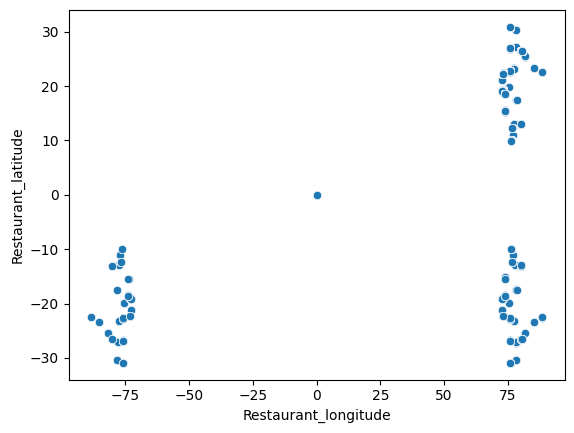

In [12]:
sns.scatterplot(data=df,x='Restaurant_longitude', y='Restaurant_latitude')

In [13]:
# the negative values are clearly wrongly coded 
df["Restaurant_longitude"].where(df["Restaurant_longitude"]==0).shape
mask = df['Restaurant_longitude'] == 0
df = df[~mask]

## all negative valuse are in front of the coast of Chile and Peru
df['Restaurant_longitude'] = df['Restaurant_longitude'].abs()
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [14]:
df=df.rename(columns={"Time_taken(min)": "time"})

## calculate distance 
import math
# function to calculate distance between two points if we have langitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Differences in latitude and longitude
    Δlat = lat2 - lat1
    Δlon = lon2 - lon1

    # Haversine formula
    a = math.sin(Δlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(Δlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371  # Earth's mean radius in kilometers
    d = R * c

    return d
df['distance'] = np.vectorize(haversine)(df['Restaurant_latitude'], df['Restaurant_longitude'], df['Delivery_location_latitude'], df['Delivery_location_longitude'])

In [15]:
df.head()

,Person_ID,delivery_id,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,time,distance
13244,0,1,39,4.4,27.163303,78.057044,27.203303,78.097044,Snack,scooter,31,5.952905
7750,0,2,21,4.7,27.163303,78.057044,27.273303,78.167044,Drinks,motorcycle,22,16.368216
18240,0,3,38,5.0,27.163303,78.057044,27.173303,78.067044,Meal,motorcycle,23,1.488315
35450,0,4,34,4.6,27.163303,78.057044,27.203303,78.097044,Buffet,electric_scooter,18,5.952905
29279,0,5,36,4.9,27.163303,78.057044,27.203303,78.097044,Meal,motorcycle,25,5.952905


In [16]:
df.columns

Index(['Person_ID', 'delivery_id', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'time', 'distance'],
      dtype='object')

<AxesSubplot: >

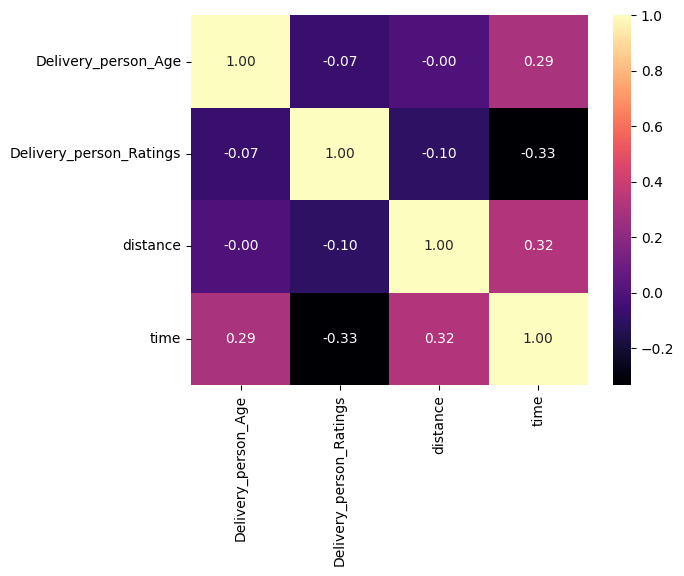

In [17]:
# univariate analysis 
X=df[["Person_ID", "Delivery_person_Age","Delivery_person_Ratings","Type_of_vehicle", "Type_of_order", "time", "distance"]]
sns.heatmap(X[["Delivery_person_Age", "Delivery_person_Ratings","distance", "time"]].corr(), annot=True, fmt=".2f", cmap="magma")

<AxesSubplot: >

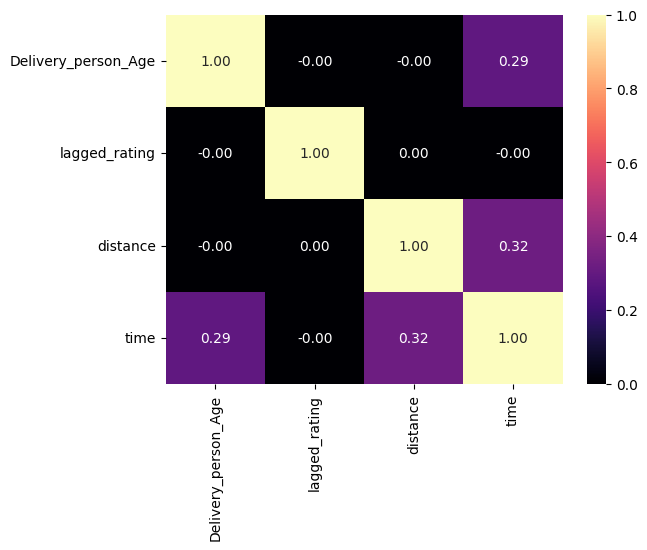

In [20]:
Xlag=X.copy()
Xlag['lagged_rating'] = df['Delivery_person_Ratings'].shift(1)
# Drop the NaN value in the first row resulting from the shift
Xlag = Xlag.dropna()
sns.heatmap(Xlag[["Delivery_person_Age", "lagged_rating","distance", "time"]].corr(), annot=True, fmt=".2f", cmap="magma")

### The previous ratings doesn't affect the next order time taken , i.e., time and ratings are not dependent

<AxesSubplot: xlabel='Type_of_vehicle', ylabel='time'>

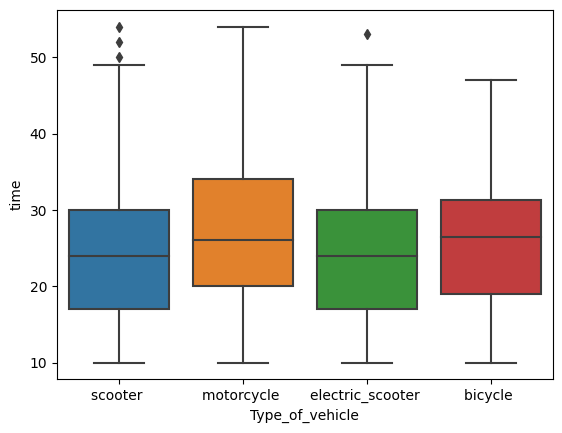

In [18]:
sns.boxplot(data=df, x="Type_of_vehicle", y="time")

<AxesSubplot: xlabel='Type_of_order', ylabel='time'>

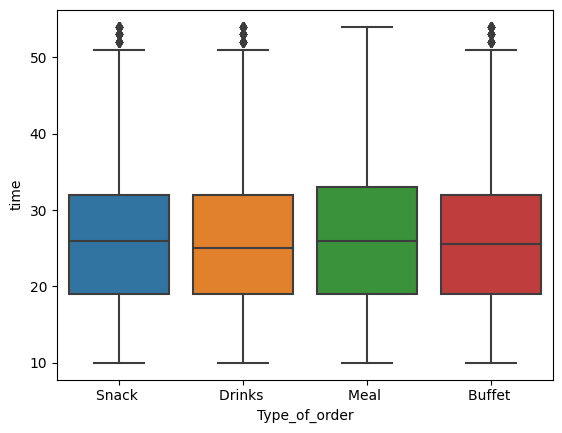

In [19]:
sns.boxplot(data=df, x="Type_of_order", y="time")

In [21]:
y=df["time"]
X=df[["Delivery_person_Age", "distance"]]

### Applying min-max scaler

In [22]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))                                                         
X = X.apply(normalize) 

In [23]:
# add categorical variables 
X_type=pd.get_dummies(df["Type_of_vehicle"], prefix="type", drop_first=True)
X=pd.concat([X, X_type], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=82)

In [27]:
models = {
    'OLS': LinearRegression(),
    'Poly': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Bayes': BayesianRidge(),
    'KNN': KNeighborsRegressor(n_neighbors=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=82),
    'gbt_model': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [28]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    preds = model.predict(X_test)  # Make predictions

    # Cross-validation for MAE
    scores_MAE = cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_absolute_error))
    sem_MAE = scipy.stats.sem(scores_MAE)

    # Cross-validation for MSE
    scores_MSE = cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))
    sem_MSE = scipy.stats.sem(scores_MSE)

    # Calculate and print metrics
    print(f"{name}: Mean absolute error: {np.mean(scores_MAE):.3f} ± {sem_MAE * 1.96:.3f},  Mean squared error: {np.mean(scores_MSE):.3f} ± {sem_MSE * 1.96:.3f}")


OLS: Mean absolute error: 6.714 ± 0.043,  Mean squared error: 69.055 ± 0.795
Poly: Mean absolute error: 6.677 ± 0.036,  Mean squared error: 68.181 ± 0.714
Bayes: Mean absolute error: 6.714 ± 0.043,  Mean squared error: 69.055 ± 0.795
KNN: Mean absolute error: 6.703 ± 0.062,  Mean squared error: 70.058 ± 1.063
Random Forest: Mean absolute error: 7.276 ± 0.062,  Mean squared error: 83.857 ± 1.457
gbt_model: Mean absolute error: 6.434 ± 0.041,  Mean squared error: 63.810 ± 0.742


In [29]:
from sklearn.model_selection import GridSearchCV
# Example hyperparameter grids for each model
param_grids = {
    'OLS': {},
    'Poly': {
        'polynomialfeatures__degree': [2, 3, 4],
        'linearregression__fit_intercept': [True, False],
    },
    'Bayes': {
        'alpha_1': [1e-6, 1e-3, 1e-1],
        'alpha_2': [1e-6, 1e-3, 1e-1],
    },
    'KNN': {
        'n_neighbors': [5, 10, 15, 20],
        'weights': ['uniform', 'distance'],
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'gbt_model': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
    }
}

In [30]:
best_models = {}
for name, model in models.items():
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    preds = best_models[name].predict(X_test)
    print(f"{name} MAE: {mean_absolute_error(y_test, preds):.3f}, MSE: {mean_squared_error(y_test, preds):.3f}")

Best parameters for OLS: {}
OLS MAE: 6.750, MSE: 70.170
Best parameters for Poly: {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 4}
Poly MAE: 6.629, MSE: 67.807
Best parameters for Bayes: {'alpha_1': 0.1, 'alpha_2': 1e-06}
Bayes MAE: 6.750, MSE: 70.171
Best parameters for KNN: {'n_neighbors': 20, 'weights': 'uniform'}
KNN MAE: 6.636, MSE: 68.272
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest MAE: 6.525, MSE: 65.721
Best parameters for gbt_model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
gbt_model MAE: 6.477, MSE: 64.855


In [36]:
for name, model in models.items():
    preds = model.predict(X_test.iloc[[-1]])[0]
    print(f"{name}: predicted delivery time {round(preds)}, true value {y_test.iloc[-1]}")

OLS: predicted delivery time 32, true value 46
Poly: predicted delivery time 31, true value 46
Bayes: predicted delivery time 32, true value 46
KNN: predicted delivery time 30, true value 46
Random Forest: predicted delivery time 26, true value 46
gbt_model: predicted delivery time 27, true value 46


In [38]:
!pip install mapie

   ---------------------------------------- 0.0/144.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/144.0 kB ? eta -:--:--
   ---------------------- ----------------- 81.9/144.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  143.4/144.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 144.0/144.0 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from mapie.metrics import regression_coverage_score, regression_mean_width_score
from mapie.regression import MapieRegressor
models = {
    #'OLS': LinearRegression(),
    'Poly': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),    ## could add the ridge regression on the polynomial form 
    #'Bayes': BayesianRidge(),
    #'gbt_model': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    mapie = MapieRegressor(model) 
    mapie.fit(X_train, y_train)
    preds, preds_pis = mapie.predict(X_test, alpha=[0.10])  # pis: prediction intervals 
    y_err = np.abs(preds_pis[:, :, 0].T - preds)            # y_err is the difference from the mean top the boprder of the CI, so the CI width is:  y_err *2 
    
    # Print out statistics
    mae_test = mean_absolute_error(y_test, preds)
    coverage = regression_coverage_score(y_test, preds_pis[:, 0, 0], preds_pis[:, 1, 0])
    print(f"{name}: MAE: {mae_test:.3f}, Width of 95% prediction interval: {np.mean(y_err) * 2:.3f}, Coverage: {coverage:.3f}")
    print(f"The actual value of any new prediction is expected to lie between the prediction value ± {np.mean(y_err):.3f}")

Poly: MAE: 6.700, Width of 95% prediction interval: 26.741, Coverage: 0.897
The actual value of any new prediction is expected to lie between the prediction value ± 13.370


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mapie\utils.py:621: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(
